In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw


In [2]:
dg10 = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")
lat_rho_10 = dg10.variables["lat_rho"]
lon_rho_10 = dg10.variables["lon_rho"]
dg10.close()

dg4 = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc")
lat_rho_4 = dg4.variables["lat_rho"]
lon_rho_4 = dg4.variables["lon_rho"]
dg4.close()

dg2 = xr.open_dataset("/scratch/project_2000339/boeiradi/waom2_frc/waom2extend_grd.nc")
lat_rho_2 = dg2.variables["lat_rho"]
lon_rho_2 = dg2.variables["lon_rho"]
dg2.close()



In [3]:
rho_grid=np.arange(26.,28.,0.05) # for sigma-0
len_rho_grid=len(rho_grid)

# figures
fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'

# plot with bars
width=.023

# convert to rate per year:
Dt = 1000/0.05

print(rho_grid[19],rho_grid[39])

26.950000000000014 27.950000000000028


In [4]:
# read WAOM10 WMT maps
d10 = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/Full_vint_WMTmaps.nc')
salt_net_10 = d10.variables['map_salt_net']
salt_adv_10 = d10.variables['map_salt_adv']
salt_diff_10 = d10.variables['map_salt_diff']
salt_hdiff_10 = d10.variables['map_salt_hdiff']
salt_vdiff_10 = d10.variables['map_salt_vdiff']
salt_sfc_10 = d10.variables['map_salt_sfc']
d10.close()


In [5]:
# read WAOM10 WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_diag/Full_vint_WMTmaps.nc')
salt_net_4 = d4.variables['map_salt_net']
salt_adv_4 = d4.variables['map_salt_adv']
salt_diff_4 = d4.variables['map_salt_diff']
salt_hdiff_4 = d4.variables['map_salt_hdiff']
salt_vdiff_4 = d4.variables['map_salt_vdiff']
salt_sfc_4 = d4.variables['map_salt_sfc']
d4.close()

In [6]:
# read WAOM10 WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_notides_diag/Full_vint_WMTmaps.nc')
salt_net_4nt = d4.variables['map_salt_net']
salt_adv_4nt = d4.variables['map_salt_adv']
salt_diff_4nt = d4.variables['map_salt_diff']
salt_hdiff_4nt = d4.variables['map_salt_hdiff']
salt_vdiff_4nt = d4.variables['map_salt_vdiff']
salt_sfc_4nt = d4.variables['map_salt_sfc']
d4.close()

In [7]:
# read WAOM10 WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_10km-bathy_diag/Full_vint_WMTmaps.nc')
salt_net_4c = d4.variables['map_salt_net']
salt_adv_4c = d4.variables['map_salt_adv']
salt_diff_4c = d4.variables['map_salt_diff']
salt_hdiff_4c = d4.variables['map_salt_hdiff']
salt_vdiff_4c = d4.variables['map_salt_vdiff']
salt_sfc_4c = d4.variables['map_salt_sfc']
d4.close()

In [8]:
# read WAOM2 WMT maps
d2 = xr.open_dataset('/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5/Full_vint_WMTmaps.nc')
salt_net_2 = d2.variables['map_salt_net']
salt_adv_2 = d2.variables['map_salt_adv']
salt_diff_2 = d2.variables['map_salt_diff']
salt_hdiff_2 = d2.variables['map_salt_hdiff']
salt_vdiff_2 = d2.variables['map_salt_vdiff']
salt_sfc_2 = d2.variables['map_salt_sfc']
d2.close()

In [9]:
np.squeeze(salt_net_2).shape

(21, 2800, 3150)

In [10]:
### plot maps
import matplotlib.path as mpath
import cartopy.feature as cfeature

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

proj = ccrs.SouthPolarStereo()

di = xr.open_dataset('/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
h = di.variables["h"]


In [11]:
print(rho_grid[19:40])
print(rho_grid[19+7])
print(rho_grid[19+11])

#
# salt_net_sum = np.nansum(salt_net, axis=0)
# salt_adv_sum = np.nansum(salt_adv, axis=0)
# salt_diff_sum = np.nansum(salt_diff, axis=0)
# salt_hdiff_sum = np.nansum(salt_hdiff, axis=0)
# salt_vdiff_sum = np.nansum(salt_vdiff, axis=0)
# salt_sfc_sum = np.nansum(salt_sfc, axis=0)

[26.95 27.   27.05 27.1  27.15 27.2  27.25 27.3  27.35 27.4  27.45 27.5
 27.55 27.6  27.65 27.7  27.75 27.8  27.85 27.9  27.95]
27.30000000000002
27.50000000000002


In [12]:
print(np.nansum(np.squeeze(salt_vdiff_10[7:11]), axis=0).shape)

(560, 630)


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

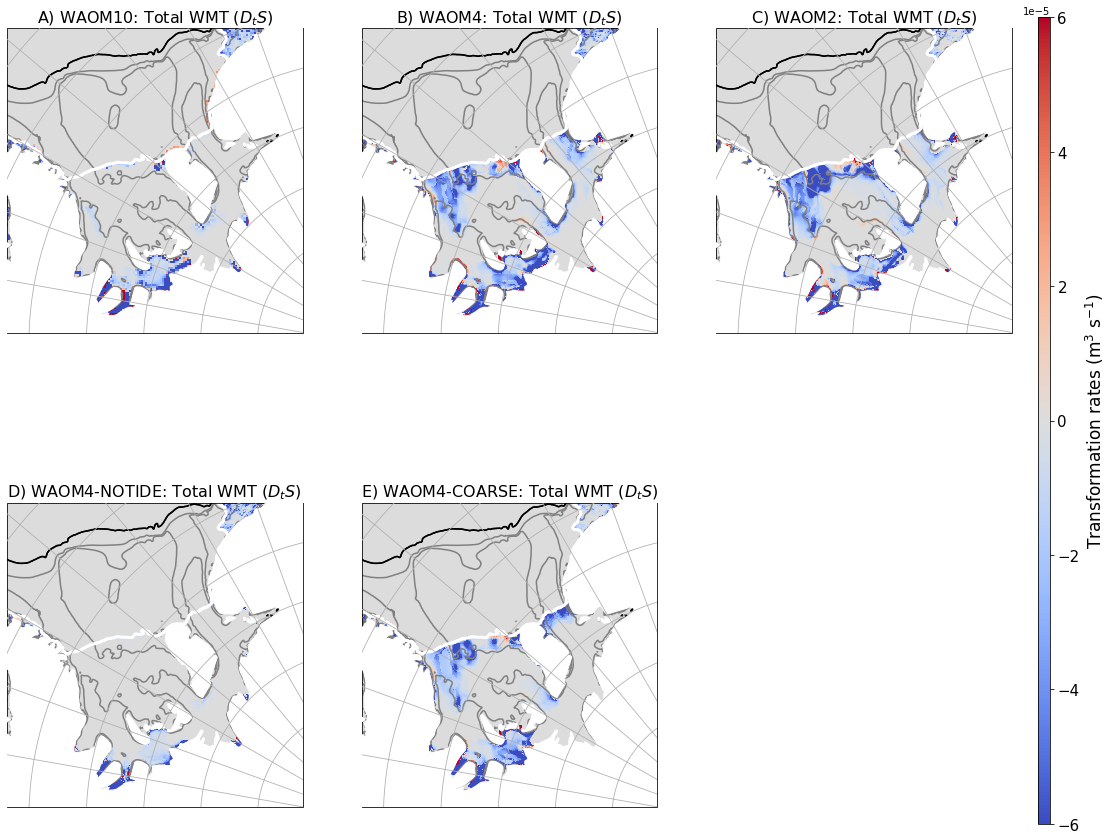

In [13]:
## plots FRIS

# integrated from 27.3:27.5 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=11

salt_net_Wed_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_Wed_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_Wed_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_Wed_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_Wed_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_Wed_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_Wed_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_Wed_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_Wed_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_Wed_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_Wed_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_Wed_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_Wed_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_Wed_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_Wed_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_Wed_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_Wed_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_Wed_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_Wed_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_Wed_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_Wed_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_Wed_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_Wed_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_Wed_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_Wed_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_Wed_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_Wed_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_Wed_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_Wed_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_Wed_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)



# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(1500,2500,1)
ylimit = np.arange(500,1500,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10-salt_sfc_Wed_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4-salt_sfc_Wed_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_Wed_2-salt_sfc_Wed_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_Wed_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,4, projection=proj)
plt.title('D) WAOM4-NOTIDE: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4nt-salt_sfc_Wed_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax5 = fig.add_subplot(2,3,5, projection=proj)
plt.title('E) WAOM4-COARSE: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4c-salt_sfc_Wed_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax5.gridlines(zorder=4)
ax5.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_iceshelf_RFIS_27.3-27.5kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [14]:
print(rho_grid[19+11])
print(rho_grid[19+13])

27.50000000000002
27.600000000000023


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

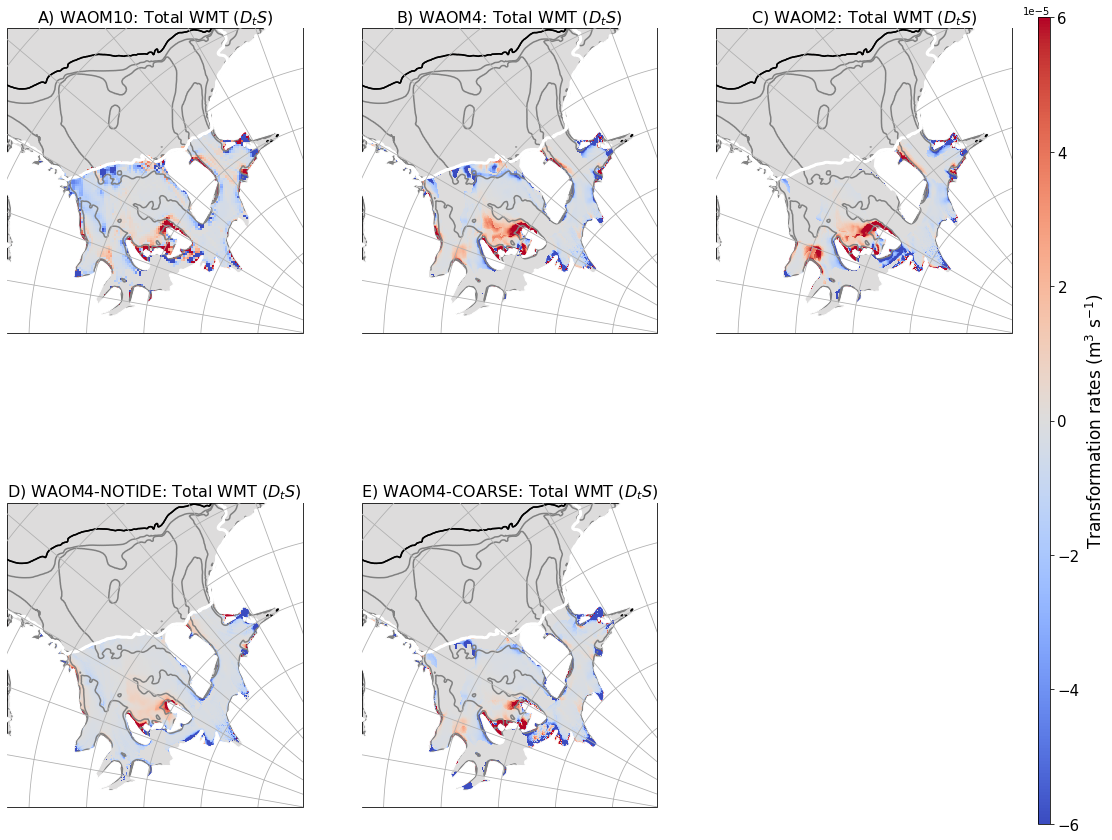

In [15]:
## plots FRIS

# integrated from 27.5:27.6 kg m-3: peak of buoyancy loss (refreezing)

# indexes [imin:imax]
imin=11
imax=13

salt_net_Wed_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_Wed_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_Wed_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_Wed_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_Wed_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_Wed_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_Wed_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_Wed_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_Wed_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_Wed_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_Wed_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_Wed_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_Wed_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_Wed_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_Wed_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_Wed_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_Wed_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_Wed_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_Wed_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_Wed_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_Wed_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_Wed_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_Wed_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_Wed_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_Wed_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_Wed_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_Wed_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_Wed_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_Wed_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_Wed_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)



## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10-salt_sfc_Wed_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4-salt_sfc_Wed_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_Wed_2-salt_sfc_Wed_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_Wed_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,4, projection=proj)
plt.title('D) WAOM4-NOTIDE: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4nt-salt_sfc_Wed_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax5 = fig.add_subplot(2,3,5, projection=proj)
plt.title('E) WAOM4-COARSE: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4c-salt_sfc_Wed_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax5.gridlines(zorder=4)
ax5.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_iceshelf_RFIS_27.5-27.6kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

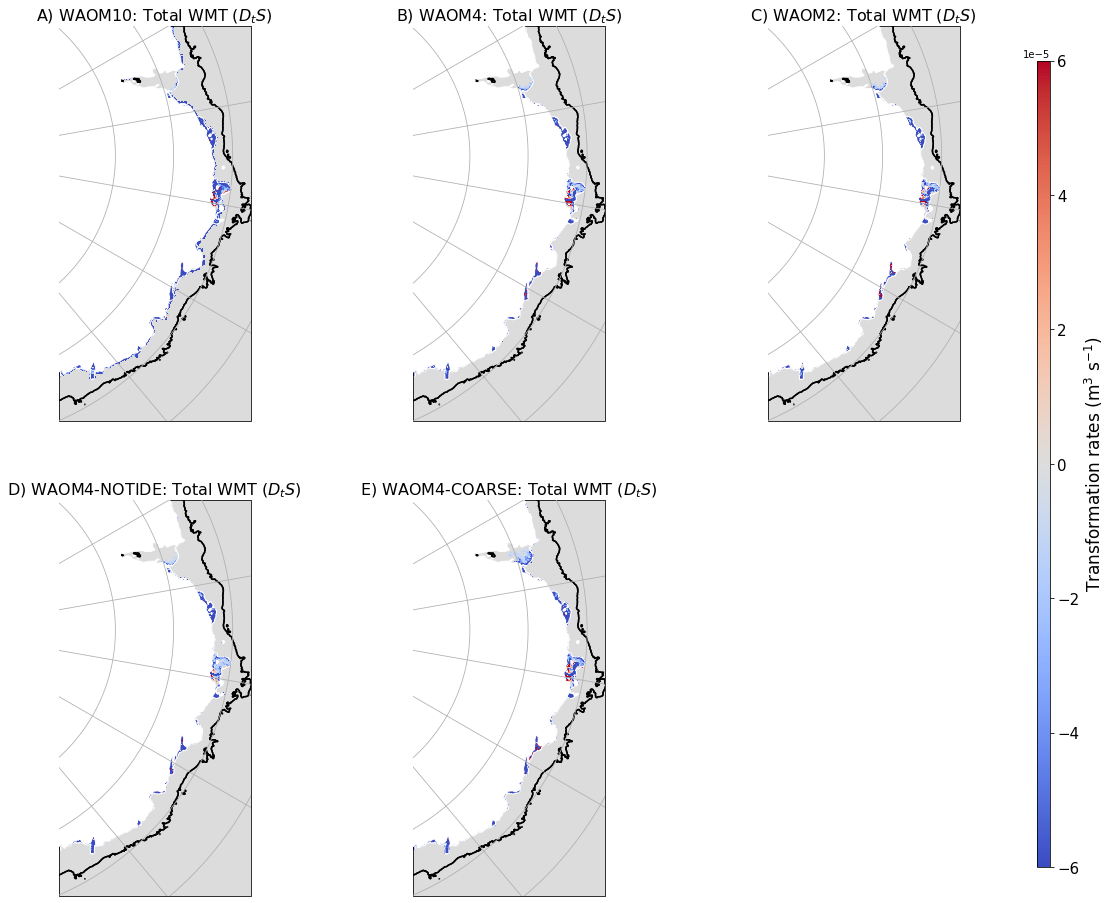

In [16]:
### East Antarctica

# integrated from 27.2:27.5 kg m-3: peak of buoyancy gain (waom10 and waom4-coarse)

# indexes [imin:imax]
imin=5
imax=12

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)



# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_EAnt_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,4, projection=proj)
plt.title('D) WAOM4-NOTIDE: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax5 = fig.add_subplot(2,3,5, projection=proj)
plt.title('E) WAOM4-COARSE: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_iceshelf_EAnt_27.2-27.55kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [17]:
print(rho_grid[19+12])
print(rho_grid[19+15])

27.550000000000022
27.700000000000024


In [ ]:
### East Antarctica

# integrated from 27.55:27.7 kg m-3: peak of buoyancy gain (waom4/2)

# indexes [imin:imax]
imin=13
imax=15

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_EAnt_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,4, projection=proj)
plt.title('D) WAOM4-NOTIDE: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax5 = fig.add_subplot(2,3,5, projection=proj)
plt.title('E) WAOM4-COARSE: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_iceshelf_EAnt_27.6-27.7kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

In [ ]:
### East Antarctica

# using larger density interval!!!
# integrated from 27.2:27.7 kg m-3: peak of buoyancy gain (waom4/2)

# indexes [imin:imax]
imin=5
imax=17

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_EAnt_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,4, projection=proj)
plt.title('D) WAOM4-NOTIDE: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax5 = fig.add_subplot(2,3,5, projection=proj)
plt.title('E) WAOM4-COARSE: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
### West Antarctica

# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain 

# indexes [imin:imax]
imin=5
imax=15

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)


## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)


fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,4, projection=proj)
plt.title('D) WAOM4-NOTIDE: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax5 = fig.add_subplot(2,3,5, projection=proj)
plt.title('E) WAOM4-COARSE: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
### West Antarctica

# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain 

# indexes [imin:imax]
imin=5
imax=15

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)


## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)


fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10-salt_sfc_WAnt_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4-salt_sfc_WAnt_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2: Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2-salt_sfc_WAnt_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,4, projection=proj)
plt.title('D) WAOM4-NOTIDE: Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4nt-salt_sfc_WAnt_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax5 = fig.add_subplot(2,3,5, projection=proj)
plt.title('E) WAOM4-COARSE: Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4c-salt_sfc_WAnt_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_vdiff_annual_yr20_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
### West Antarctica

# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain 

# indexes [imin:imax]
imin=5
imax=15

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Surface salt flux', fontsize=16)
# cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10-salt_sfc_WAnt_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_sfc_WAnt_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Surface salt flux', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4-salt_sfc_WAnt_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_sfc_WAnt_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2: Surface salt flux', fontsize=16)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2-salt_sfc_WAnt_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_sfc_WAnt_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,4, projection=proj)
plt.title('D) WAOM4-NOTIDE: Surface salt flux', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4nt-salt_sfc_WAnt_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_sfc_WAnt_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax5 = fig.add_subplot(2,3,5, projection=proj)
plt.title('E) WAOM4-COARSE: Surface salt flux', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4c-salt_sfc_WAnt_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_sfc_WAnt_4c, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_sfc_annual_yr20_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
### Figures for the paper:

# 1) FRIS: only show WAOM10 x WAOM4 x WAOM4-NOTIDE: upper row
# bottom temperature and annual currents: lower row

## plots FRIS

# integrated from 27.3:27.5 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=11

salt_net_Wed_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_Wed_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_Wed_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_Wed_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_Wed_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_Wed_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_Wed_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_Wed_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_Wed_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_Wed_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_Wed_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_Wed_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_Wed_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_Wed_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_Wed_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_Wed_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_Wed_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_Wed_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_Wed_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_Wed_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_Wed_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_Wed_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_Wed_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_Wed_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_Wed_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_Wed_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_Wed_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_Wed_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_Wed_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_Wed_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)



# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(1500,2500,1)
ylimit = np.arange(500,1500,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10-salt_sfc_Wed_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4-salt_sfc_Wed_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax4 = fig.add_subplot(2,3,3, projection=proj)
plt.title('D) WAOM4-NOTIDE: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4nt-salt_sfc_Wed_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4nt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-6e-5, vmax=6e-5)
ax4.gridlines(zorder=4)
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# temperature and currents (annual)
                        
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_iceshelf_RFIS_27.3-27.5kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()
